<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/Prediction_of_marks_of_a_student_based_on_the_number_of_hours_he_she_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [21]:
 #Import all libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
# Read the data from the provided link
file = "https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"
df = pd.read_csv(file, header=0)

In [4]:
# Understand the data by reading first 5 and last 5 records from the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# Check the shape of data
df.shape

(25, 2)

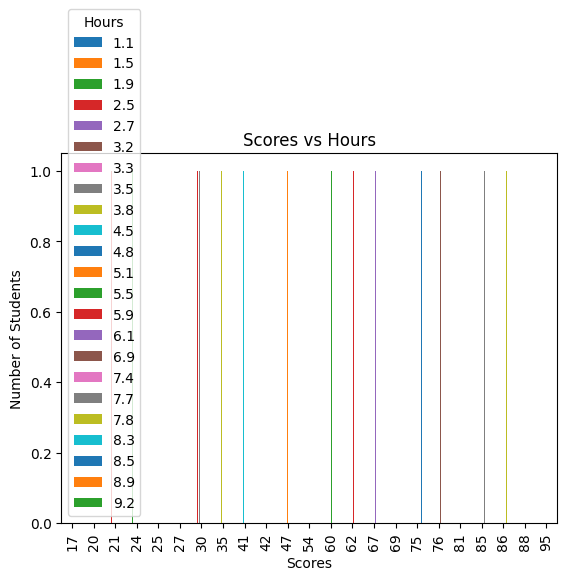

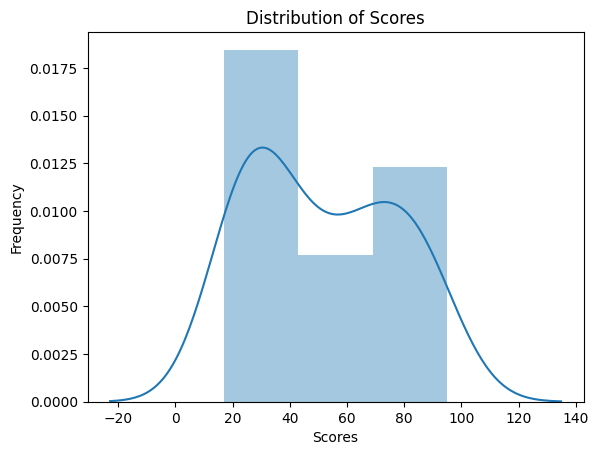

In [19]:
# Group the data using score and hours, then Using bar chart, plot score vs hours.
# The next phase is to enter distribution scores and plot them according to the requirement,
# here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

import matplotlib.pyplot as plt
# Group the data using score and hours
grouped_data = df.groupby(['Scores', 'Hours'])['Scores'].count().unstack()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar')

# Set the title, x_label, and y_label
plt.title('Scores vs Hours')
plt.xlabel('Scores')
plt.ylabel('Number of Students')

# Show the plot
plt.show()

# Create a distribution plot of the scores
sns.distplot(df['Scores'])

# Set the title, x_label, and y_label
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Show the plot
plt.show()


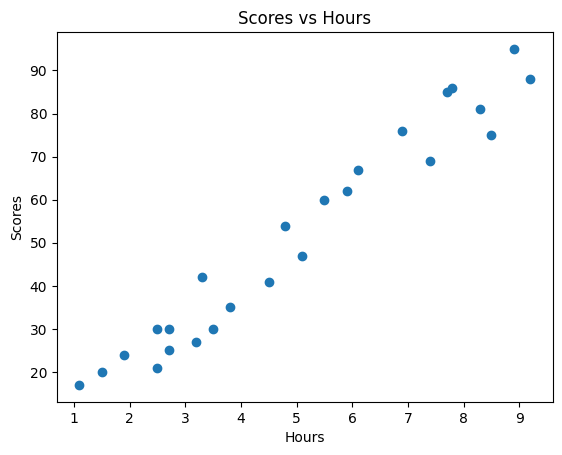

In [20]:
# Visualize distribution of data using scatter plot

# Create a scatter plot of the scores vs hours
plt.scatter(df['Hours'], df['Scores'])

# Set the title, x_label, and y_label
plt.title('Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Show the plot
plt.show()


In [23]:
# Prepare the data by splitting it into Training and Test set

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Hours'], df['Scores'], test_size=0.2, random_state=42)

# Reshape the data to be suitable for the model
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


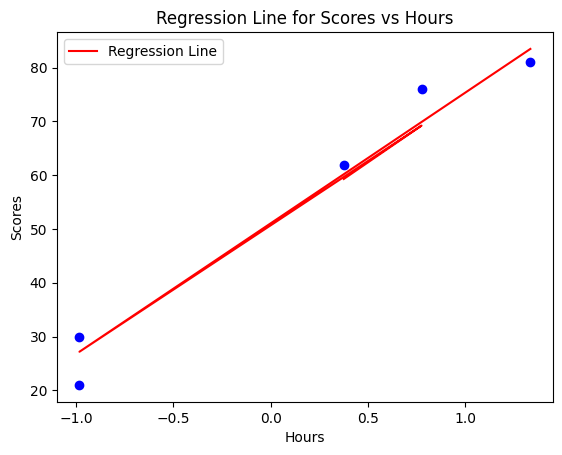

In [24]:
# Plot the regression line

import matplotlib.pyplot as plt
# Create a pipeline with a polynomial features transformer and a linear regression model
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the training data
poly_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = poly_reg.predict(X_test)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Set the title, x_label, and y_label
plt.title('Regression Line for Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Show the plot
plt.legend()
plt.show()


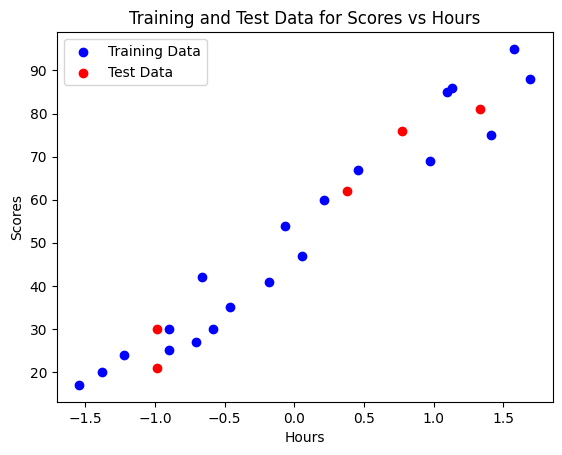

Predicted Score: 330.69050972877403
Actual Score: 21
The predicted score is higher than the actual score.


In [25]:
# Plot the training and test data
# Predict the score and compare predicted and actual score

# Plot the training and test data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Set the title, x_label, and y_label
plt.title('Training and Test Data for Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Show the plot
plt.legend()
plt.show()

# Predict the score
predicted_score = poly_reg.predict([[9.25]])

# Print the predicted and actual score
print('Predicted Score:', predicted_score[0])
print('Actual Score:', y_test[0])

# Compare the predicted and actual score
if predicted_score[0] > y_test[0]:
    print('The predicted score is higher than the actual score.')
elif predicted_score[0] < y_test[0]:
    print('The predicted score is lower than the actual score.')
else:
    print('The predicted score is equal to the actual score.')


In [27]:
# Predict accuracy using r2square

# Calculate the accuracy of the model using R-squared
r2_score_poly = r2_score(y_test, y_pred)
print('R-squared score:', r2_score_poly)


R-squared score: 0.9641965165901752


In [28]:
# Predict the percentage grade of a student if study hours are 9.25

# Predict the score
predicted_score = poly_reg.predict([[9.25]])
print('Predicted Score:', predicted_score[0])


Predicted Score: 330.69050972877403


In [29]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the results
print('Mean absolute error:', mae)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)


Mean absolute error: 4.191112820294049
Mean squared error: 21.066769638340908
Root mean squared error: 4.589855078141456


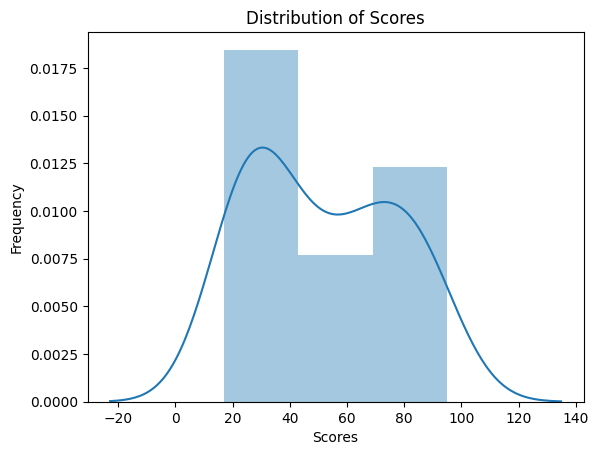

In [30]:
# Import seaborn and plot the distribution as well

import matplotlib.pyplot as plt
import seaborn as sns

# Create a distribution plot of the scores
sns.distplot(df['Scores'])

# Set the title, x_label, and y_label
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [32]:
# Print actual vs predicted percentage score

print('Actual Score:', y_test[0])
print('Predicted Score:', predicted_score[0])


Actual Score: 21
Predicted Score: 330.69050972877403


In [33]:
# Apply ridge and grid search to improvise your model

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100],
    'poly_features__degree': [1, 2, 3]
}

# Create the grid search object
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Predict on the test data
y_pred = grid.predict(X_test)

# Calculate the R-squared score
r2_score_ridge = r2_score(y_test, y_pred)

# Print the R-squared score
print(r2_score_ridge)


{'poly_features__degree': 1, 'ridge__alpha': 0.1}
0.9673084999554353
